In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [2]:
X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
y = np.array([0, 1, 1, 0])

In [3]:
mlp = MLPClassifier(hidden_layer_sizes = (4, 4), activation = 'relu',\
                   max_iter = 1000)
mlp.fit(X, y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 4), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [4]:
mlp.predict([[0, 0]])

array([0])

In [5]:
def plot_decision():
    x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
    y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
    h = 0.01
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap = plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

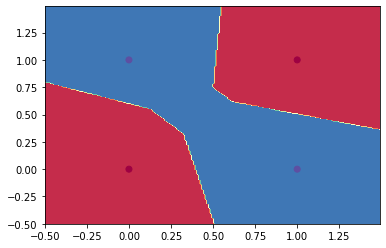

In [6]:
plot_decision()

#### Multi-Layer Perceptron - Digit Image Dataset

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()

In [8]:
X = digits.data
y = digits.target

In [9]:
X.shape

(1797, 64)

In [10]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

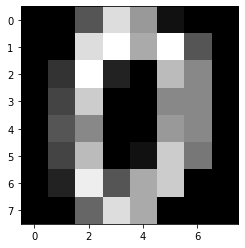

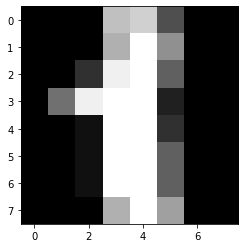

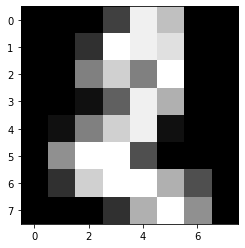

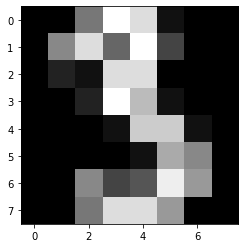

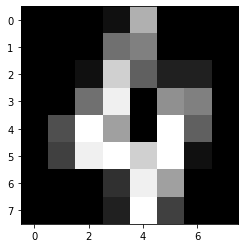

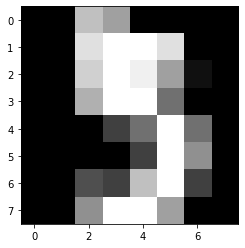

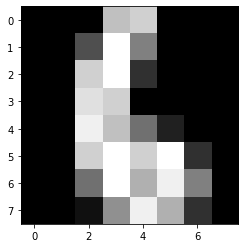

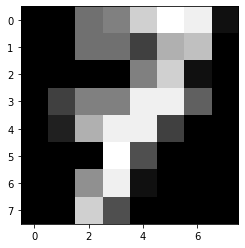

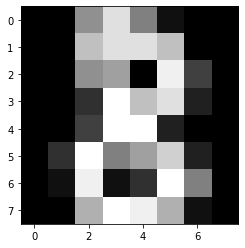

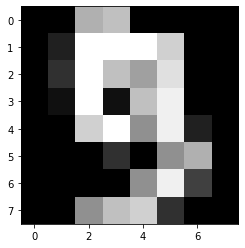

In [12]:
for i in range(10):
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.show()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,\
                                                   shuffle=False)

In [17]:
mlp = MLPClassifier(hidden_layer_sizes=(40, 10), max_iter=1000,
                   activation='logistic', alpha=1e-4,solver = 'adam',
                    random_state=99)
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(40, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=99, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [18]:
print('On training set |',mlp.score(X_train, y_train))
print('On testing set  | ', mlp.score(X_test, y_test))

On training set | 0.9992044550517104
On testing set  |  0.912962962962963


#### changing solver

In [23]:
solver = ['lbfgs', 'sgd', 'adam']

In [28]:
for i, sol in enumerate(solver):
    print(i)
    print(sol)

0
lbfgs
1
sgd
2
adam


In [32]:
for i, sol in enumerate(solver):
    mlp = MLPClassifier(hidden_layer_sizes=(40, 10), max_iter=1000,
                        activation='logistic', alpha=1e-4,solver = sol,
                        random_state=99)
    mlp.fit(X_train, y_train)
    print(f'From using {sol} to be solver')
    print(f'On training set |{mlp.score(X_train, y_train)}')
    print(f'On testing set  |{mlp.score(X_test, y_test)}', "\n")

From using lbfgs to be solver
On training set |0.9992044550517104
On testing set  |0.8685185185185185 



C:\Users\theka\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


From using sgd to be solver
On training set |0.8949880668257757
On testing set  |0.8481481481481481 

From using adam to be solver
On training set |0.9992044550517104
On testing set  |0.912962962962963 



In [17]:
mlp = MLPClassifier(hidden_layer_sizes=(40, 10), max_iter=1000,
                   activation='logistic', alpha=1e-4,solver = 'adam',
                    random_state=99)
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(40, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=99, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [18]:
print('On training set |',mlp.score(X_train, y_train))
print('On testing set  | ', mlp.score(X_test, y_test))

On training set | 0.9992044550517104
On testing set  |  0.912962962962963


In [19]:
len(mlp.coefs_)

3

In [20]:
mlp.coefs_[0].shape

(64, 40)

In [21]:
mlp.coefs_[1].shape

(40, 10)

In [22]:
mlp.coefs_[2].shape

(10, 10)

In [36]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

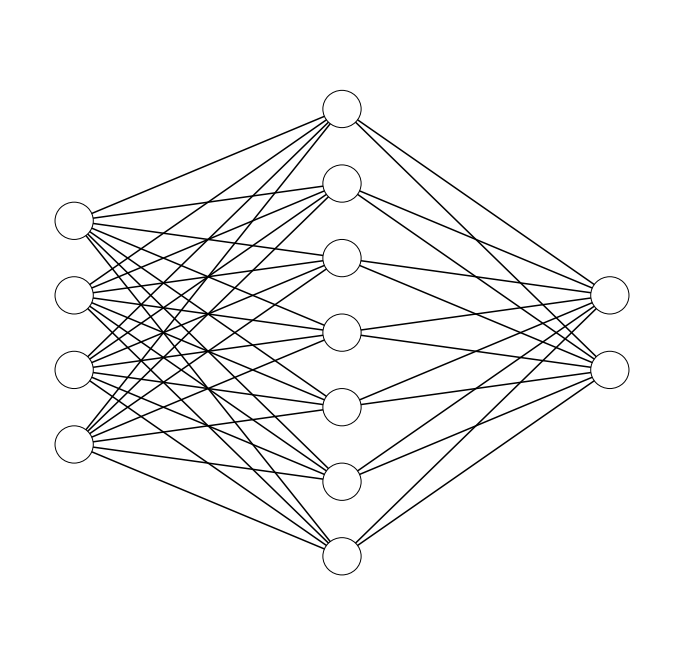

In [37]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [4, 7, 2])